In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   


In [77]:
df = pd.read_csv(r"C:\Users\Amari\Downloads\archive (2)\web_marketing_data.csv", encoding='latin1')
df

,Date,User_ID,Session_Duration,Page_Views,Source,Medium,Campaign,Device_Category,Country,New_User,Conversions,Revenue
0,6/6/2023,1,448,7,Referral,Direct,Spring Promo,Tablet,USA,1,2,124
1,6/19/2023,2,94,1,Referral,Social Media,Summer Sale,Desktop,India,1,1,130
2,6/29/2023,3,595,6,Direct,Referral,Winter Campaign,Tablet,India,1,1,136
3,6/1/2023,4,263,9,Social,Organic Search,NaN,Tablet,Australia,1,0,0
4,6/30/2023,5,242,1,Referral,Referral,Spring Promo,Tablet,USA,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6/13/2023,9996,219,9,Referral,Organic Search,Winter Campaign,Tablet,India,1,0,0
9996,6/3/2023,9997,151,4,Organic,Direct,Summer Sale,Mobile,UK,0,1,135
9997,6/22/2023,9998,462,6,Social,Social Media,Summer Sale,Desktop,India,1,2,188
9998,6/18/2023,9999,357,6,Referral,Social Media,Spring Promo,Mobile,France,1,2,268


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              10000 non-null  object
 1   User_ID           10000 non-null  int64 
 2   Session_Duration  10000 non-null  int64 
 3   Page_Views        10000 non-null  int64 
 4   Source            10000 non-null  object
 5   Medium            10000 non-null  object
 6   Campaign          7510 non-null   object
 7   Device_Category   10000 non-null  object
 8   Country           10000 non-null  object
 9   New_User          10000 non-null  int64 
 10  Conversions       10000 non-null  int64 
 11  Revenue           10000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 937.6+ KB


In [79]:
df.describe()

,User_ID,Session_Duration,Page_Views,New_User,Conversions,Revenue
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,331.592900,5.459400,0.494900,1.508600,151.278900
std,2886.89568,155.463779,2.865619,0.499999,1.114383,124.741268
min,1.00000,60.000000,1.000000,0.000000,0.000000,0.000000
25%,2500.75000,197.000000,3.000000,0.000000,1.000000,52.000000
50%,5000.50000,334.000000,5.000000,0.000000,1.000000,134.000000
75%,7500.25000,465.000000,8.000000,1.000000,3.000000,242.000000
max,10000.00000,600.000000,10.000000,1.000000,3.000000,450.000000


In [80]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [81]:
df.nunique()

Date                   30
User_ID             10000
Session_Duration      541
Page_Views             10
Source                  4
Medium                  4
Campaign                3
Device_Category         3
Country                 7
New_User                2
Conversions             4
Revenue               252
dtype: int64

In [82]:
#amount of missing data in the dataset 
missing_counts = df.isna().sum()
missing_data = missing_counts[missing_counts > 0]
missing_data

Campaign    2490
dtype: int64

In [83]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [84]:
#observerd missing data by percent 
missing_pct = round(df.isnull().sum() / len(df) * 100, 1)
print(missing_pct)

Date                 0.0
User_ID              0.0
Session_Duration     0.0
Page_Views           0.0
Source               0.0
Medium               0.0
Campaign            24.9
Device_Category      0.0
Country              0.0
New_User             0.0
Conversions          0.0
Revenue              0.0
dtype: float64


In [85]:
#i Further Investigated Missing Data
#Sometimes, investigating why the  data is missing can reveal patterns or errors that can be addressed.


In [86]:
# checking if the missing Campaign values are concentrated around specific dates.
missing_by_date = df[df['Campaign'].isna()].groupby('Date').size()
print(missing_by_date)

Date
6/1/2023      80
6/10/2023     74
6/11/2023     89
6/12/2023     91
6/13/2023     97
6/14/2023     93
6/15/2023     76
6/16/2023     95
6/17/2023     72
6/18/2023     78
6/19/2023     87
6/2/2023      70
6/20/2023     79
6/21/2023     69
6/22/2023     86
6/23/2023     63
6/24/2023     75
6/25/2023     93
6/26/2023     94
6/27/2023     82
6/28/2023     91
6/29/2023    100
6/3/2023      87
6/30/2023     74
6/4/2023      82
6/5/2023      71
6/6/2023      80
6/7/2023     100
6/8/2023      80
6/9/2023      82
dtype: int64


In [87]:
# Count missing 'Campaign' values by 'Source' and 'Medium'
missing_by_source = df[df['Campaign'].isna()].groupby(['Source', 'Medium']).size()
print(missing_by_source)

Source    Medium        
Direct    Direct            167
          Organic Search    157
          Referral          141
          Social Media      148
Organic   Direct            168
          Organic Search    148
          Referral          145
          Social Media      159
Referral  Direct            151
          Organic Search    160
          Referral          135
          Social Media      156
Social    Direct            166
          Organic Search    181
          Referral          168
          Social Media      140
dtype: int64


In [88]:
# Compare summary statistics of 'Session_Duration' and 'Page_Views' for missing vs non-missing 'Campaign'
missing_metrics = df[df['Campaign'].isna()][['Session_Duration', 'Page_Views']].describe()
non_missing_metrics = df[df['Campaign'].notna()][['Session_Duration', 'Page_Views']].describe()

print("Missing Campaign Metrics:\n", missing_metrics)
print("Non-Missing Campaign Metrics:\n", non_missing_metrics)

Missing Campaign Metrics:
        Session_Duration   Page_Views
count       2490.000000  2490.000000
mean         326.843775     5.492771
std          156.649643     2.888192
min           60.000000     1.000000
25%          188.000000     3.000000
50%          326.000000     5.000000
75%          460.000000     8.000000
max          600.000000    10.000000
Non-Missing Campaign Metrics:
        Session_Duration   Page_Views
count       7510.000000  7510.000000
mean         333.167510     5.448336
std          155.046967     2.858203
min           60.000000     1.000000
25%          199.000000     3.000000
50%          336.000000     5.000000
75%          466.000000     8.000000
max          600.000000    10.000000


In [89]:
# Count missing 'Campaign' values by 'Device_Category' and 'Country'
missing_by_device = df[df['Campaign'].isna()].groupby(['Device_Category', 'Country']).size()
print(missing_by_device)

Device_Category  Country  
Desktop          Australia    119
                 Canada        97
                 France       104
                 Germany      124
                 India        108
                 UK           144
                 USA          122
Mobile           Australia    120
                 Canada       135
                 France       108
                 Germany      114
                 India        128
                 UK           131
                 USA          115
Tablet           Australia    143
                 Canada       101
                 France       110
                 Germany      102
                 India        119
                 UK           124
                 USA          122
dtype: int64


In [90]:
df = df.assign(Campaign=df['Campaign'].fillna('Unknown'))

In [91]:
missing_camp = df['Campaign'].isna().sum()
print("Missing Campaign data :", missing_camp)


Missing Campaign data : 0


In [92]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')



In [93]:
# Creating new columns for da week and month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week  
df['Month'] = df['Date'].dt.month



In [94]:
 # 1 User Engagement Analysis

In [95]:
# Group data and calculate average session duration and page views
avg_metrics = df.groupby(['Campaign', 'Device_Category', 'Source']).agg({
    'Session_Duration': 'mean',
    'Page_Views': 'mean'
}).reset_index()

# Rename columns to make it clear
avg_metrics.rename(columns={'Session_Duration': 'Avg_Session_Duration', 'Page_Views': 'Avg_Page_Views'}, inplace=True)


avg_metrics.head()


,Campaign,Device_Category,Source,Avg_Session_Duration,Avg_Page_Views
0,Spring Promo,Desktop,Direct,344.870536,5.361607
1,Spring Promo,Desktop,Organic,320.722222,5.782828
2,Spring Promo,Desktop,Referral,334.579208,5.648515
3,Spring Promo,Desktop,Social,327.641148,5.846890
4,Spring Promo,Mobile,Direct,341.159204,5.547264


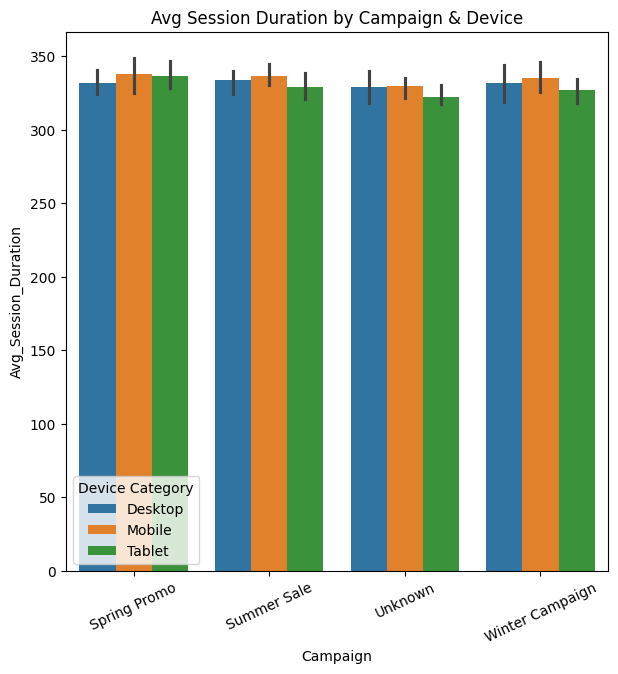

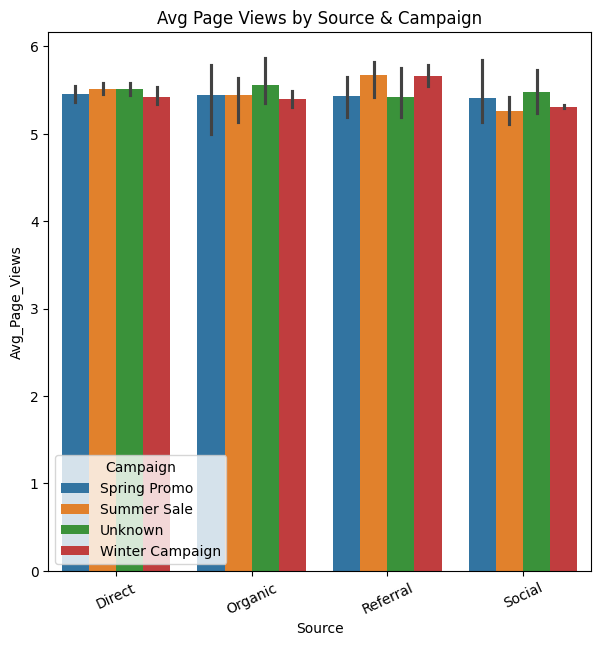

In [102]:

# Plot average session duration by campaign and device category
plt.figure(figsize=(7, 7))
sns.barplot(data=avg_metrics, x='Campaign', y='Avg_Session_Duration', hue='Device_Category')
plt.title('Avg Session Duration by Campaign & Device')
plt.xticks(rotation=25)
plt.legend(title='Device Category')
plt.show()

# Plot average page views by source and campaign
plt.figure(figsize=(7, 7))
sns.barplot(data=avg_metrics, x='Source', y='Avg_Page_Views', hue='Campaign')
plt.title('Avg Page Views by Source & Campaign')
plt.xticks(rotation=25)
plt.legend(title='Campaign')
plt.show()



In [ ]:
#2 Campaign Performance Comparison

In [20]:
# Group data by 'Campaign' to calculate total conversions, total sessions (page views), and total revenue per campaign
campaign_summary = df.groupby('Campaign').agg({
    'Conversions': 'sum',
    'Page_Views': 'sum',  # lets say Page_Views represents the total sessions for conversion rate calculation
    'Revenue': 'sum'
}).reset_index()

# Calculate conversion rate per campaign
campaign_summary['Conversion_Rate'] = (campaign_summary['Conversions'] / campaign_summary['Page_Views']) * 100

# Round up revenue values to nearest whole number and format with commas for easier readability
campaign_summary['Revenue'] = campaign_summary['Revenue'].apply(lambda x: round(x))

# Sort campaigns by Conversion Rate and Revenue for better visualization
campaign_summary = campaign_summary.sort_values(by=['Conversion_Rate', 'Revenue'], ascending=[False, False])



campaign_summary.head()


,Campaign,Conversions,Page_Views,Revenue,Conversion_Rate
0,Spring Promo,3904,13899,390949,28.088352
1,Summer Sale,3765,13481,380576,27.928195
3,Winter Campaign,3752,13537,374975,27.716628
2,Unknown,3665,13677,366289,26.796812


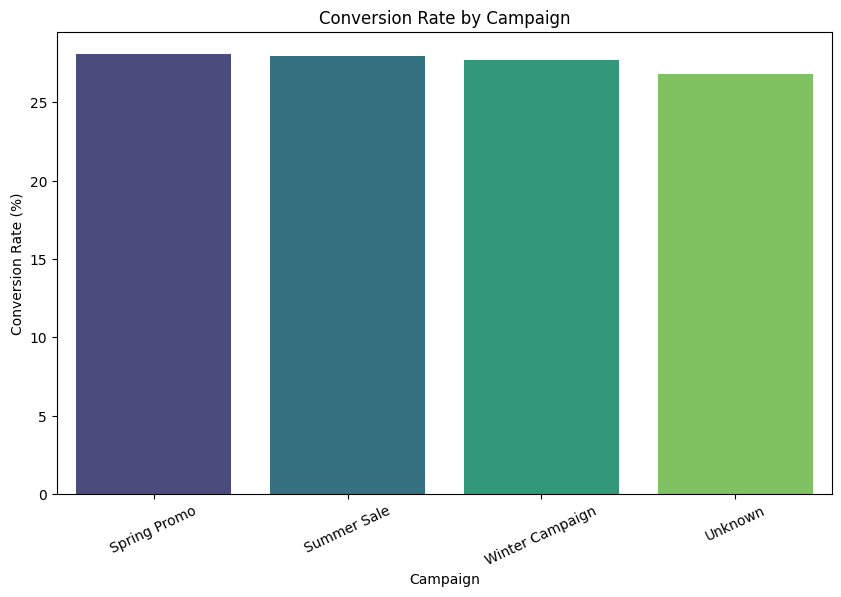

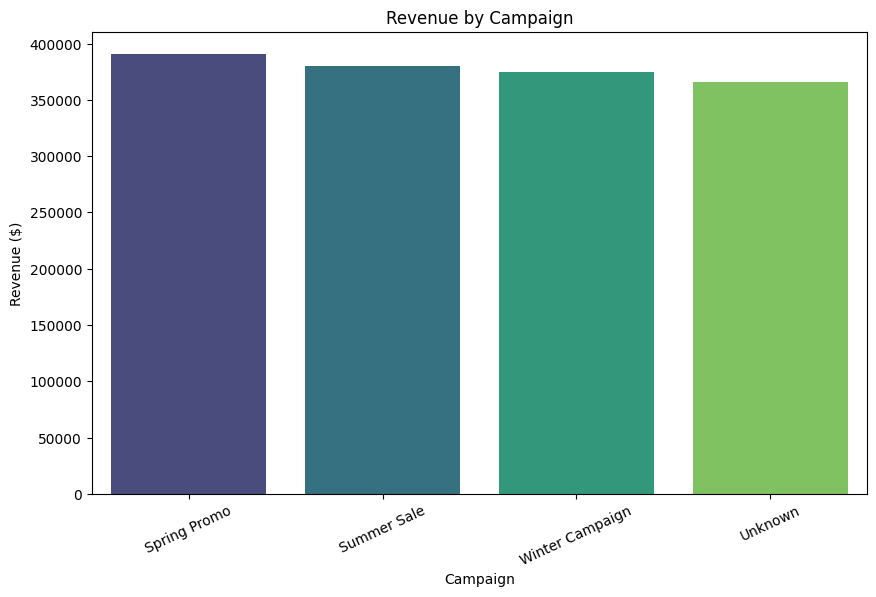

In [98]:

# Plot Conversion Rate by Campaign
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign', y='Conversion_Rate', data=campaign_summary, hue='Campaign', dodge=False, palette='viridis', legend=False)
plt.title('Conversion Rate by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=25)
plt.show()

# Plot Revenue by Campaign
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign', y='Revenue', data=campaign_summary, hue='Campaign', dodge=False, palette='viridis', legend=False)
plt.title('Revenue by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=25)
plt.show()

In [ ]:
# 3 Device Category Insights

In [22]:

# Group data by Device Category to calculate total conversions, total sessions, and average session duration
device_summary = df.groupby('Device_Category').agg({
    'Conversions': 'sum',
    'Page_Views': 'sum',          #  Page_Views represents total sessions
    'Session_Duration': 'mean'    # then i Calculate the average session duratio
}).reset_index()

# Calculate conversion rate per device category
device_summary['Conversion_Rate'] = (device_summary['Conversions'] / device_summary['Page_Views']) * 100

device_summary



,Device_Category,Conversions,Page_Views,Session_Duration,Conversion_Rate
0,Desktop,4967,18080,331.215728,27.472345
1,Mobile,5205,18493,334.832895,28.145785
2,Tablet,4914,18021,328.613781,27.268187


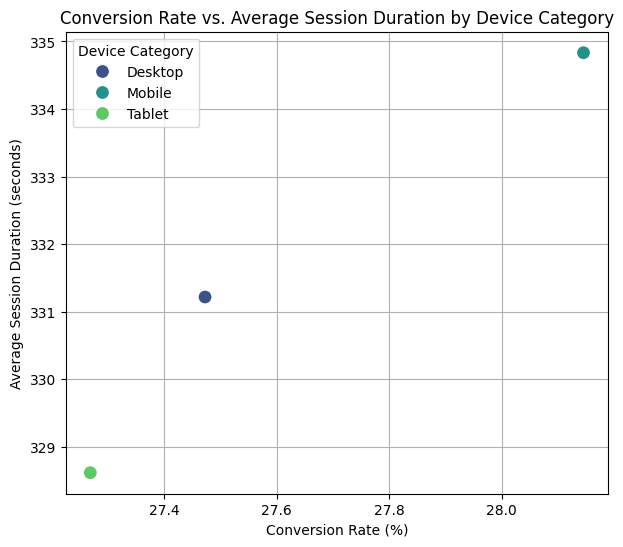

In [99]:

# Scatter plot to compare Conversion Rate and Average Session Duration by Device Category
plt.figure(figsize=(7, 6))

sns.scatterplot(
    x='Conversion_Rate',
    y='Session_Duration',
    data=device_summary,
    hue='Device_Category',  
    s=100,  
    palette='viridis'
)


plt.title("Conversion Rate vs. Average Session Duration by Device Category")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Average Session Duration (seconds)")
plt.legend(title="Device Category")
plt.grid(True)

plt.show()


In [ ]:
# 4 Source and Medium Traffic Effectiveness

In [75]:

# Group data by Source and Medium
source_medium_summary = df.groupby(['Source', 'Medium']).agg({
    'Conversions': 'sum',
    'Revenue': 'sum',          # Total revenue for each Source and Medium
    'Page_Views': 'sum'          # Total page views can be used as total sessions
}).reset_index()

# Calculate the total sessions if needed (using Page Views as a proxy)
source_medium_summary['Sessions'] = source_medium_summary['Page_Views']

# Calculate conversion rate
source_medium_summary['Conversion_Rate'] = (source_medium_summary['Conversions'] / source_medium_summary['Sessions']) * 100


source_medium_summary.head()

,Source,Medium,Conversions,Revenue,Page_Views,Sessions,Conversion_Rate
0,Direct,Direct,979,99301,3571,3571,27.415290
1,Direct,Organic Search,993,96217,3472,3472,28.600230
2,Direct,Referral,965,96698,3485,3485,27.690100
3,Direct,Social Media,896,89942,3359,3359,26.674606
4,Organic,Direct,977,96804,3719,3719,26.270503


In [ ]:
# 5 Geographical Analysis

In [25]:
# Grouping data by Country to calculate total conversions, total revenue, and sessions
country_summary = df.groupby('Country').agg({
    'Conversions': 'sum',
    'Revenue': 'sum',
    'Page_Views': 'sum'  
}).reset_index()

# Calculate conversion rate for each country
country_summary['Conversion_Rate'] = (country_summary['Conversions'] / country_summary['Page_Views']) * 100


print(country_summary)


     Country  Conversions  Revenue  Page_Views  Conversion_Rate
0  Australia         2127   211675        7758        27.416860
1     Canada         2208   222268        7893        27.974154
2     France         2133   213288        7502        28.432418
3    Germany         2160   220057        7683        28.114018
4      India         2104   211313        7808        26.946721
5         UK         2166   217592        8222        26.343955
6        USA         2188   216596        7728        28.312629


In [ ]:
# 6 New vs. Returning Users

In [26]:
# Group data by New_User to calculate total conversions, total revenue, and average revenue
user_summary = df.groupby('New_User').agg({
    'Conversions': 'sum',
    'Revenue': 'sum',
    'Page_Views': 'sum'  
}).reset_index()

# Calculate conversion rates
user_summary['Conversion_Rate'] = (user_summary['Conversions'] / user_summary['Page_Views']) * 100

# Calculate average revenue per conversion
user_summary['Average_Revenue'] = user_summary['Revenue'] / user_summary['Conversions']

# Rename for clarity
user_summary['User_Type'] = user_summary['New_User'].map({1: 'New Users', 0: 'Returning Users'})

# Drop the New_User column for clarity
user_summary = user_summary.drop(columns=['New_User'])


print(user_summary)


   Conversions  Revenue  Page_Views  Conversion_Rate  Average_Revenue  \
0         7576   760797       27797        27.254740       100.421990   
1         7510   751992       26797        28.025525       100.132091   

         User_Type  
0  Returning Users  
1        New Users  


In [27]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score



In [52]:
required_columns = [
    'Session_Duration', 'Page_Views', 'Campaign', 'Device_Category', 
    'Source', 'Medium', 'Conversions'
]

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Missing columns in DataFrame: {missing_columns}")
else:
    "All required columns are present."



In [53]:
# Ensure 'Conversion_Binary' exists based on 'Conversions'
if 'Conversion_Binary' not in df.columns:
    df['Conversion_Binary'] = df['Conversions'].apply(lambda x: 1 if x > 0 else 0)
else:
    "Column 'Conversion_Binary' already exists."



In [54]:
# Confirm feature and target columns before selection
if 'Conversion_Binary' not in df.columns:
    raise KeyError("'Conversion_Binary' column is missing.  check your data.")

features = df[['Session_Duration', 'Page_Views', 'Campaign', 'Device_Category', 'Source', 'Medium']]
target = df['Conversion_Binary']



In [55]:
numeric_features = ['Session_Duration', 'Page_Views']
categorical_features = ['Campaign', 'Device_Category', 'Source', 'Medium']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  
        ('cat', OneHotEncoder(), categorical_features)
    ]
)



In [56]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [57]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [58]:
pipeline.fit(X_train, y_train)
"Model training completed."



'Model training completed.'

In [59]:
y_pred = pipeline.predict(X_test)
"Predictions made on test set."



'Predictions made on test set.'

In [60]:
results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred)
}

results



{'Accuracy': 0.7435,
 'Precision': np.float64(0.7435),
 'Recall': np.float64(1.0)}